In [1]:
from rkhs.nystrom import PlainNystromRegressor

In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

## Data Generation

In [3]:
X, y = make_regression(n_samples=30000, n_features=120)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from tqdm import tqdm
tests = list()
trains = list()
ms = list()
t = tqdm(range(100, 8000, 100), leave=False)
for m in t:
    reg = PlainNystromRegressor(m=m)
    reg.fit(X_train, y_train)
    tr, te = (mean_squared_error(y_train, reg.predict(X_train)),
          mean_squared_error(y_test, reg.predict(X_test)))
    tests.append(te)
    trains.append(tr)
    ms.append(m)
    t.set_postfix(loss_te=te, loss_tr=tr, size=m)

 65%|▋| 51/79 [29:52<45:11, 96.85s/it, loss_te=607, loss_tr=

KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt

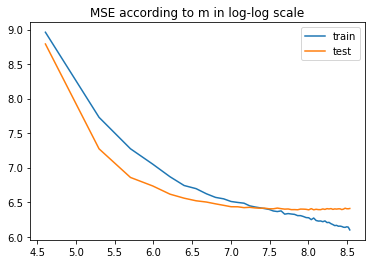

In [9]:
plt.plot(np.log(ms), np.log(trains), label='train')
plt.plot(np.log(ms), np.log(tests), label = 'test')
plt.legend()
plt.title('MSE according to m in log-log scale')
plt.savefig('./plain_nystrom_regressor_synthetic.png')
plt.show()
plt.close()

Hyper-parameters: 
- m size of sample
- $\lambda$ regularization parameter
- Kernel hyper-parameters ($\sigma$)